In [12]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
import pickle as pkl

In [13]:
df = pd.read_csv('dataset.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype 
---  ------                --------------   ----- 
 0   id                    381109 non-null  int64 
 1   Gender                381109 non-null  object
 2   Age                   381109 non-null  int64 
 3   Driving_License       381109 non-null  int64 
 4   Region_Code           381109 non-null  int64 
 5   Previously_Insured    381109 non-null  int64 
 6   Vehicle_Age           381109 non-null  object
 7   Vehicle_Damage        381109 non-null  object
 8   Annual_Premium        381109 non-null  int64 
 9   Policy_Sales_Channel  381109 non-null  int64 
 10  Vintage               381109 non-null  int64 
 11  Response              381109 non-null  int64 
dtypes: int64(9), object(3)
memory usage: 34.9+ MB


In [14]:
df.describe()

,id,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response
count,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000
mean,190555.000000,38.822584,0.997869,26.388807,0.458210,30564.389581,112.034295,154.347397,0.122563
std,110016.836208,15.511611,0.046110,13.229888,0.498251,17213.155057,54.203995,83.671304,0.327936
min,1.000000,20.000000,0.000000,0.000000,0.000000,2630.000000,1.000000,10.000000,0.000000
25%,95278.000000,25.000000,1.000000,15.000000,0.000000,24405.000000,29.000000,82.000000,0.000000
50%,190555.000000,36.000000,1.000000,28.000000,0.000000,31669.000000,133.000000,154.000000,0.000000
75%,285832.000000,49.000000,1.000000,35.000000,1.000000,39400.000000,152.000000,227.000000,0.000000
max,381109.000000,85.000000,1.000000,52.000000,1.000000,540165.000000,163.000000,299.000000,1.000000


In [15]:
df.head(20).T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
id,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20
Gender,Male,Male,Male,Male,Female,Female,Male,Female,Female,Female,Female,Female,Female,Male,Male,Male,Female,Female,Male,Female
Age,44,76,47,21,29,24,23,56,24,32,47,24,41,76,71,37,25,25,42,60
Driving_License,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
Region_Code,28,3,28,11,41,33,11,28,3,6,35,50,15,28,28,6,45,35,28,33
Previously_Insured,0,0,0,1,1,0,0,0,1,1,0,1,1,0,1,0,0,1,0,0
Vehicle_Age,> 2 Years,1-2 Year,> 2 Years,< 1 Year,< 1 Year,< 1 Year,< 1 Year,1-2 Year,< 1 Year,< 1 Year,1-2 Year,< 1 Year,1-2 Year,1-2 Year,1-2 Year,1-2 Year,< 1 Year,< 1 Year,1-2 Year,1-2 Year
Vehicle_Damage,Yes,No,Yes,No,No,Yes,Yes,Yes,No,No,Yes,No,No,Yes,No,Yes,Yes,No,Yes,Yes
Annual_Premium,40454,33536,38294,28619,27496,2630,23367,32031,27619,28771,47576,48699,31409,36770,46818,2630,26218,46622,33667,32363
Policy_Sales_Channel,26,26,26,152,152,160,152,26,152,152,124,152,14,13,30,156,160,152,124,124


In [16]:
# Check for missing values
missing_values = df.isnull().sum()
print(missing_values)

id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64


In [17]:
# Check duplicate value
df_temp = df.copy()
df_temp[(df_temp.duplicated())]

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response


Categorical Columns: ['Gender', 'Driving_License', 'Previously_Insured', 'Vehicle_Age', 'Vehicle_Damage', 'Response']
Numerical Columns: ['Age', 'Region_Code', 'Annual_Premium', 'Policy_Sales_Channel', 'Vintage']


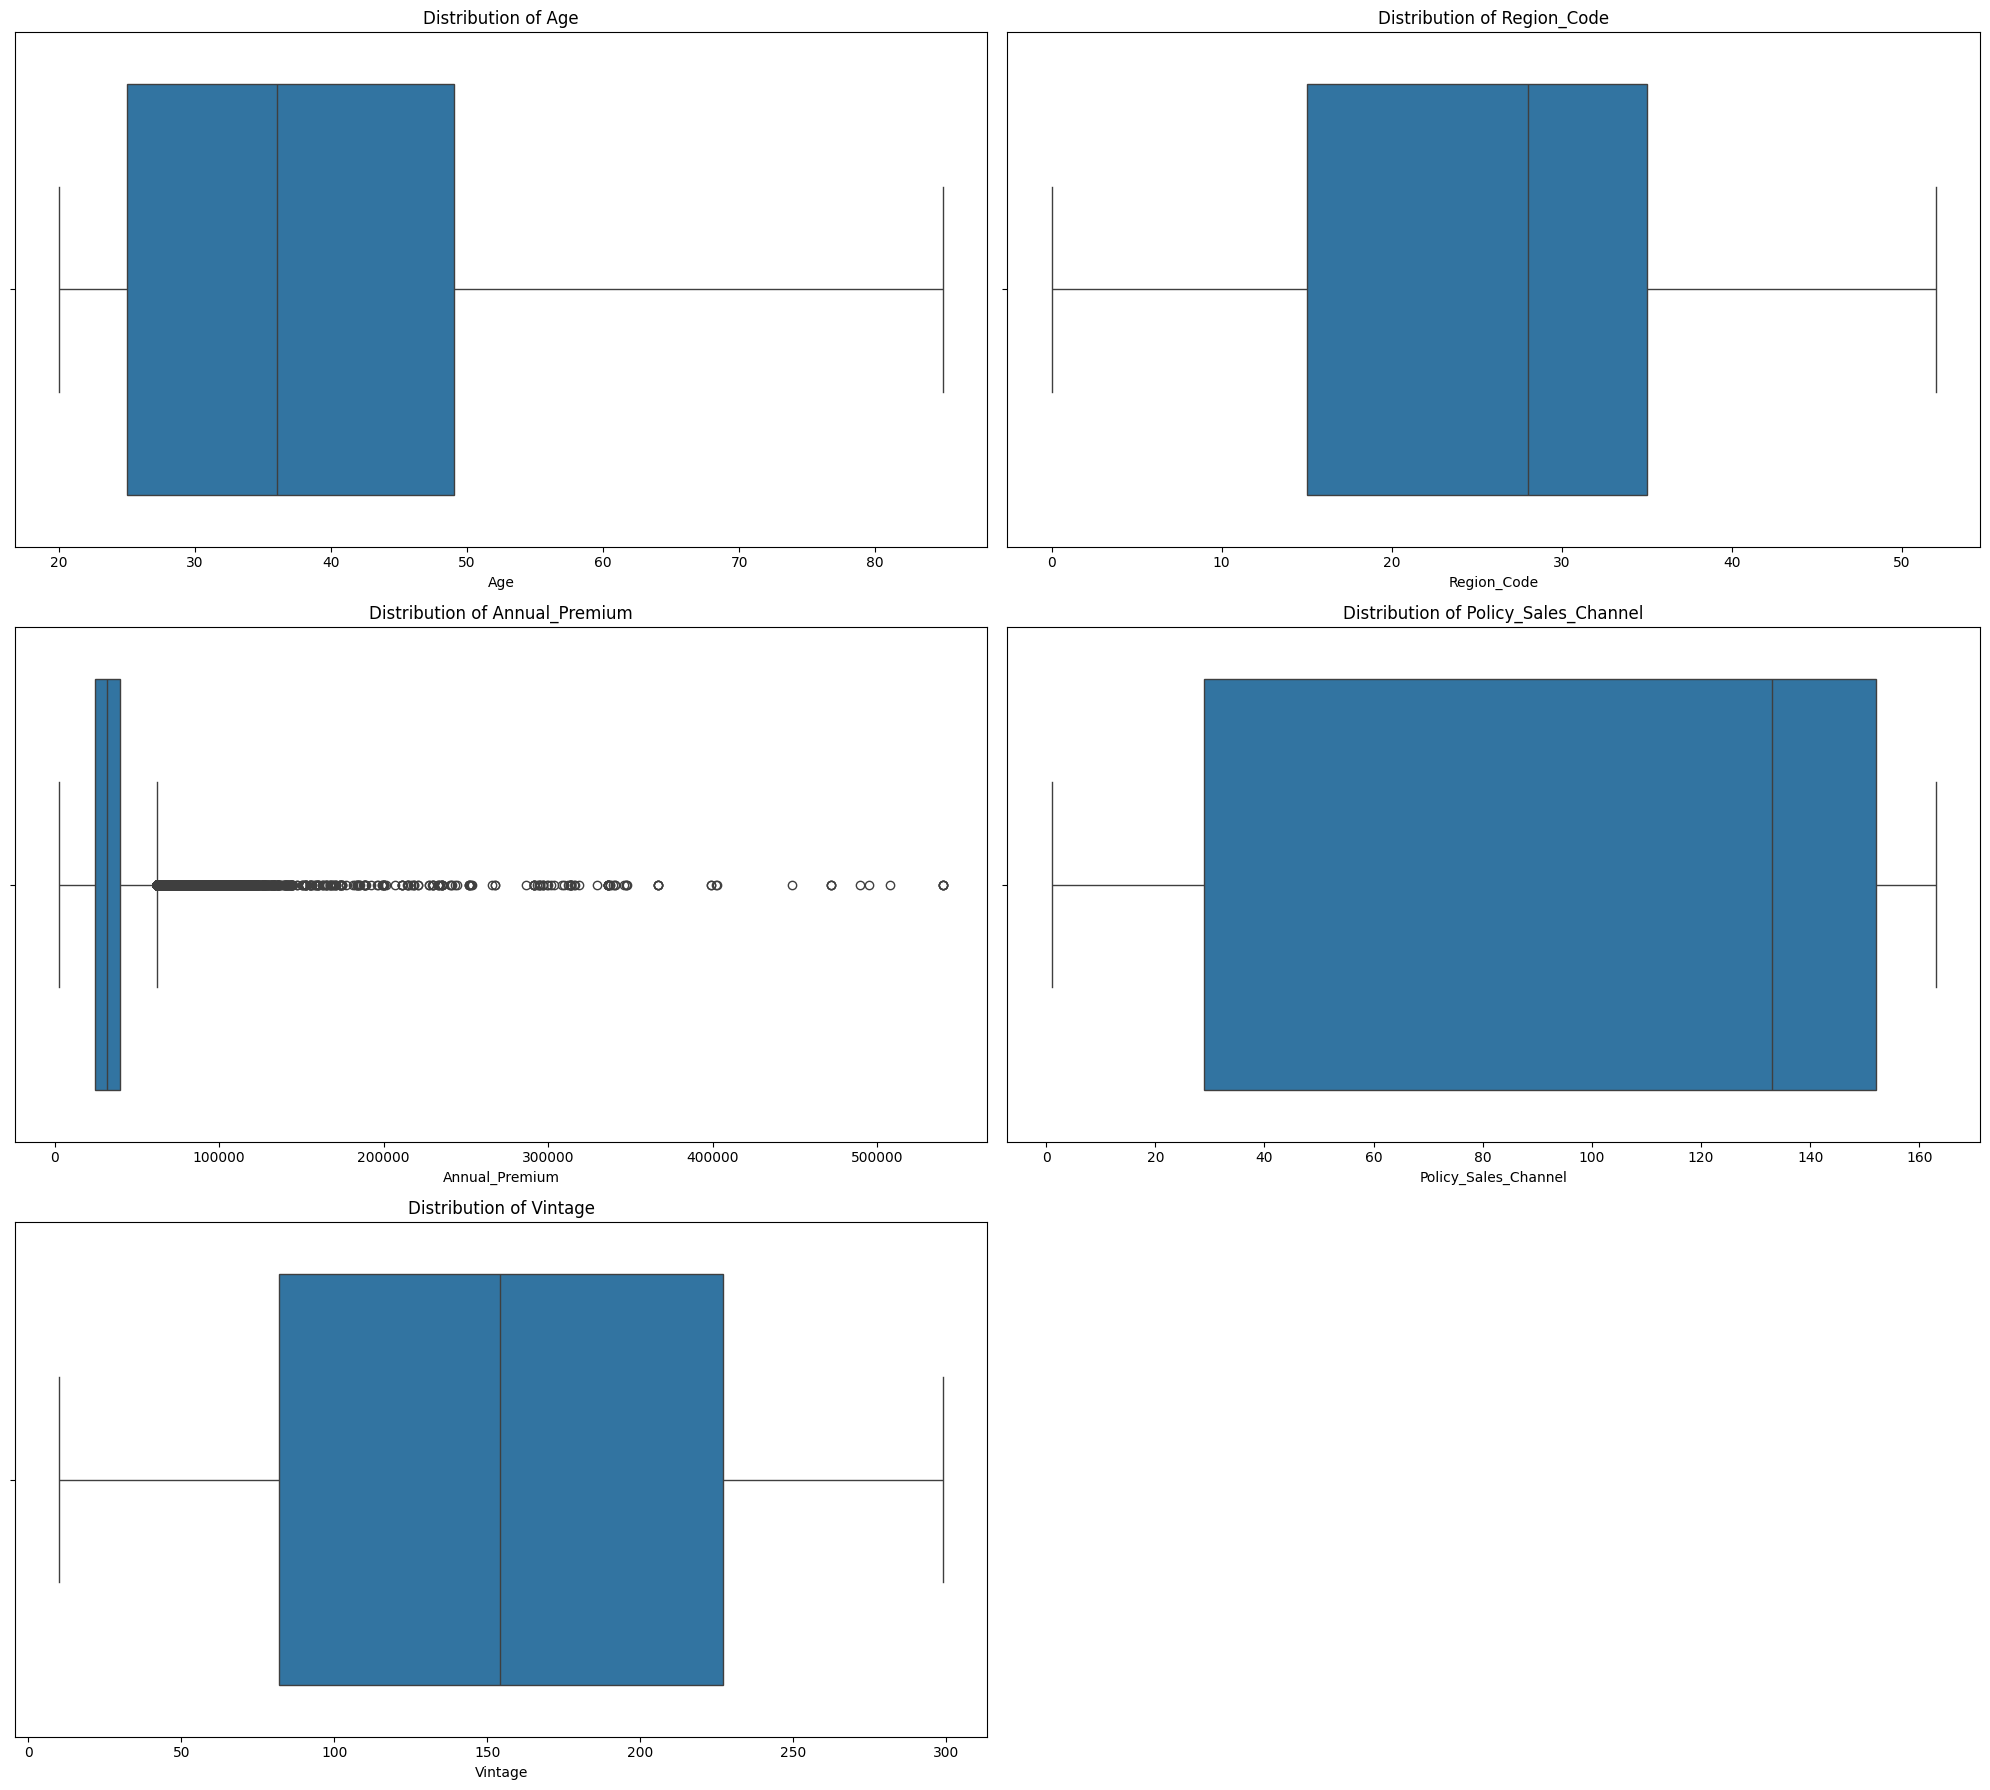

In [18]:
# Check Outliers and remove outliers
df_temp.drop(['id'], axis=1, inplace=True)
categorical_cols = []
numerical_cols = []
for col in df_temp.columns:
    if df_temp[col].nunique() <= 15:
        categorical_cols.append(col)
    else:
        numerical_cols.append(col)

print(f'Categorical Columns: {categorical_cols}')
print(f'Numerical Columns: {numerical_cols}')

plt.figure(figsize=(20,18))

for i, col in enumerate(numerical_cols):
    plt.subplot(3,2, i+1)
    sns.boxplot(data=df_temp, x = col)
    plt.title(f'Distribution of {col}')
    plt.tight_layout()

plt.show()

(370789, 11)


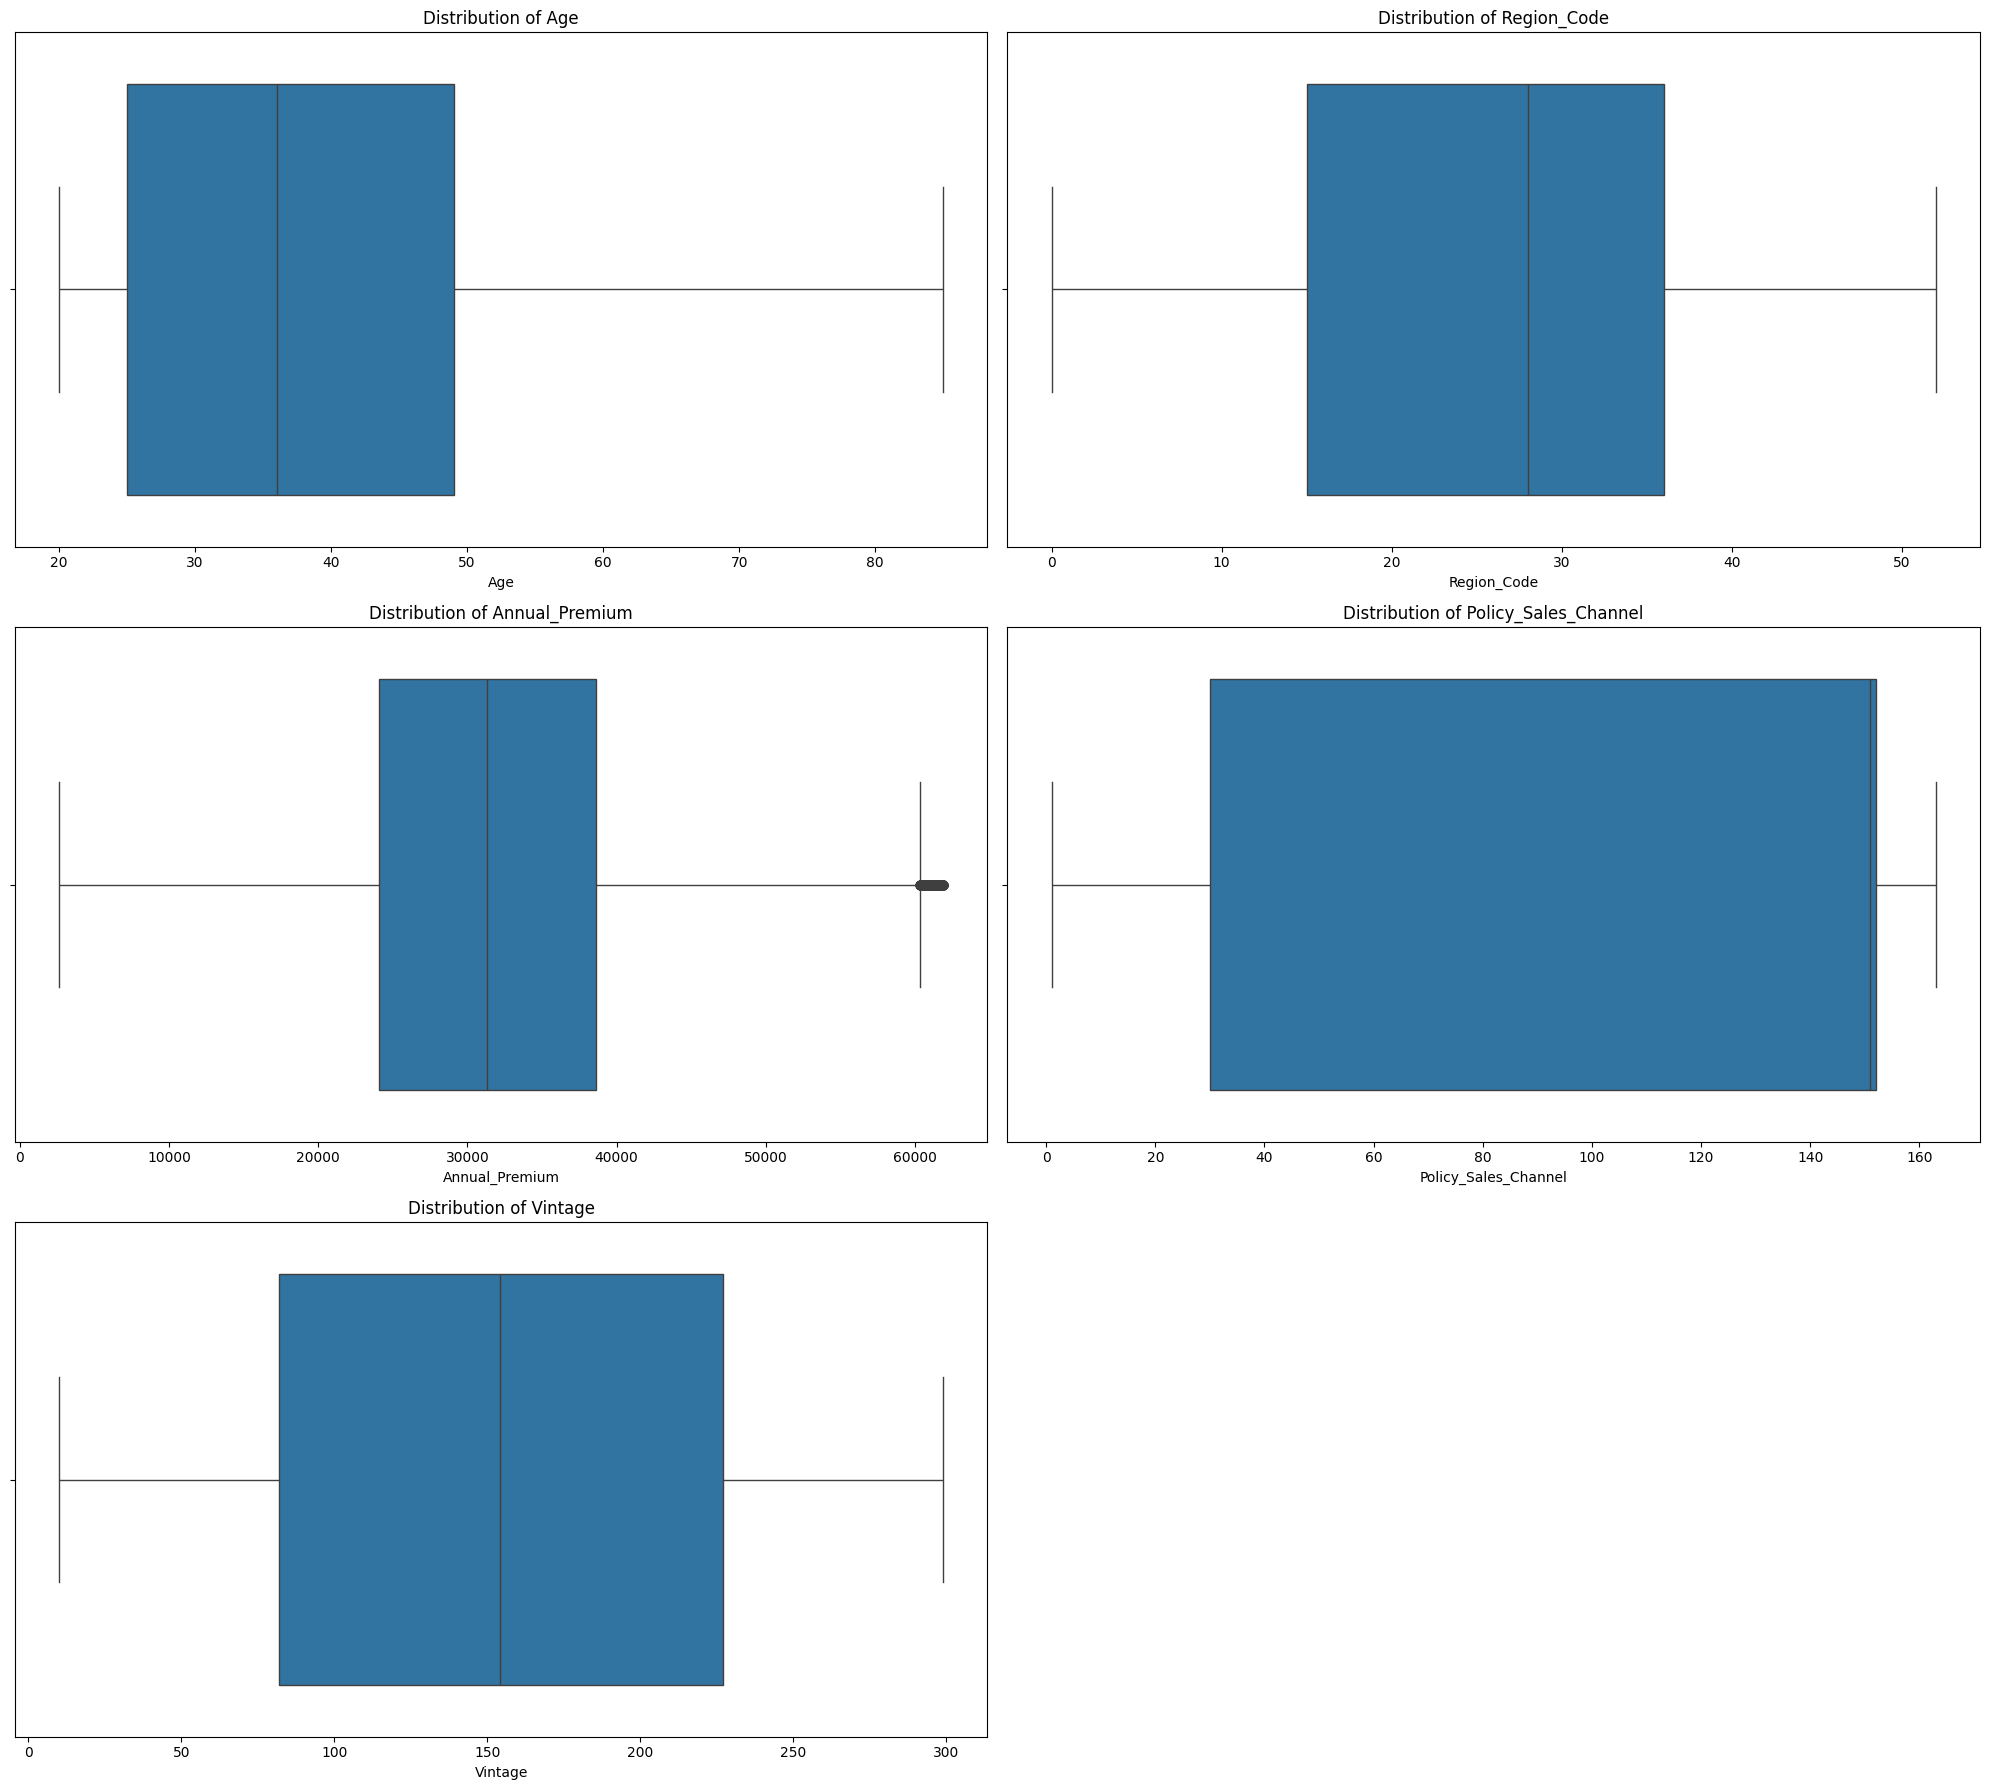

In [29]:
def remove_outliers(df, cols):
    for col in cols:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1

        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    return df

df_clean = remove_outliers(df_temp, numerical_cols)
print(df_clean.shape)
plt.figure(figsize=(20,18))
for i, col in enumerate(numerical_cols):
    plt.subplot(3,2, i+1)
    sns.boxplot(data=df_clean, x = col)
    plt.title(f'Distribution of {col}')
    plt.tight_layout()

plt.show()

In [30]:
df_clean['Annual_Premium'].describe()

count    370789.000000
mean      29264.643973
std       14743.056656
min        2630.000000
25%       24102.000000
50%       31319.000000
75%       38596.000000
max       61892.000000
Name: Annual_Premium, dtype: float64

In [6]:
#Check the unique value and each value count for Categorical Data
col = ['Vehicle_Age', 'Gender', 'Vehicle_Damage']
for i in col:
    print(df[i].value_counts())

Vehicle_Age
1-2 Year     200316
< 1 Year     164786
> 2 Years     16007
Name: count, dtype: int64
Gender
Male      206089
Female    175020
Name: count, dtype: int64
Vehicle_Damage
Yes    192413
No     188696
Name: count, dtype: int64


Check Distribusi Dataset tiap Column

<Axes: xlabel='Region_Code', ylabel='Count'>

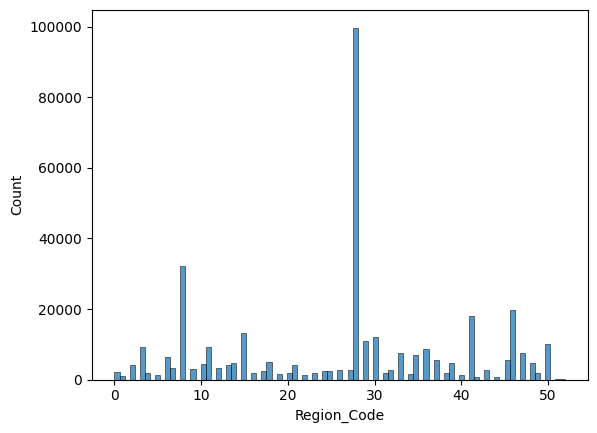

In [31]:
sns.histplot(df_clean['Region_Code'])

<Axes: xlabel='Policy_Sales_Channel', ylabel='Count'>

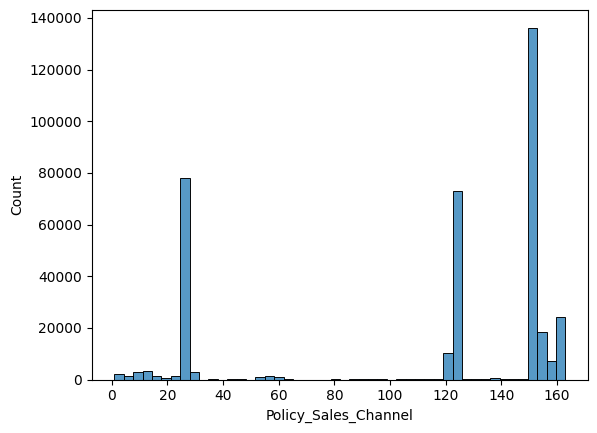

In [32]:
sns.histplot(df_clean['Policy_Sales_Channel'])

<Axes: xlabel='Vintage', ylabel='Count'>

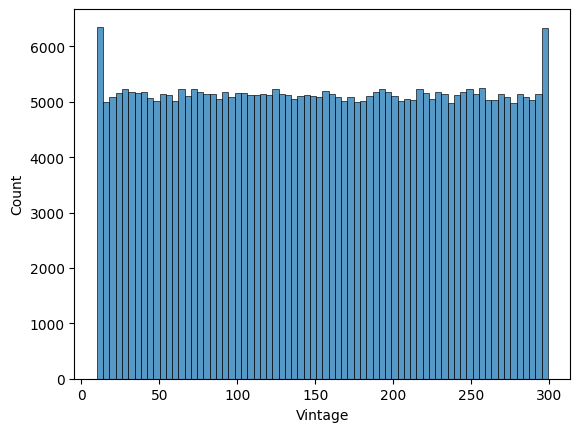

In [33]:
sns.histplot(df_clean['Vintage'])

Response
0    325634
1     45155
Name: count, dtype: int64
11.84831636093611


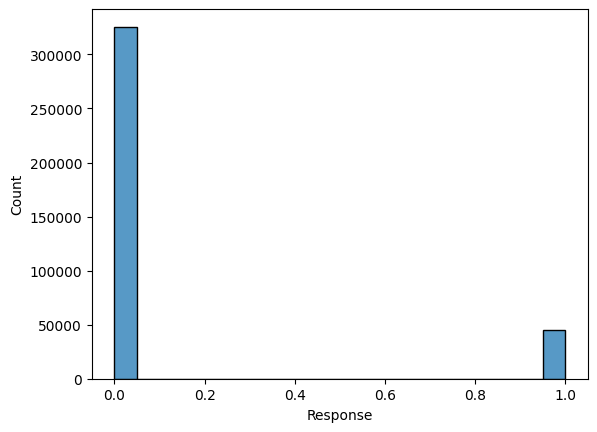

In [36]:
#Let's check the target variable
sns.histplot(df_clean['Response'])
print((df_clean['Response'].value_counts()))
print((((df_clean['Response']==1).sum())/len(df['Response']))*100)

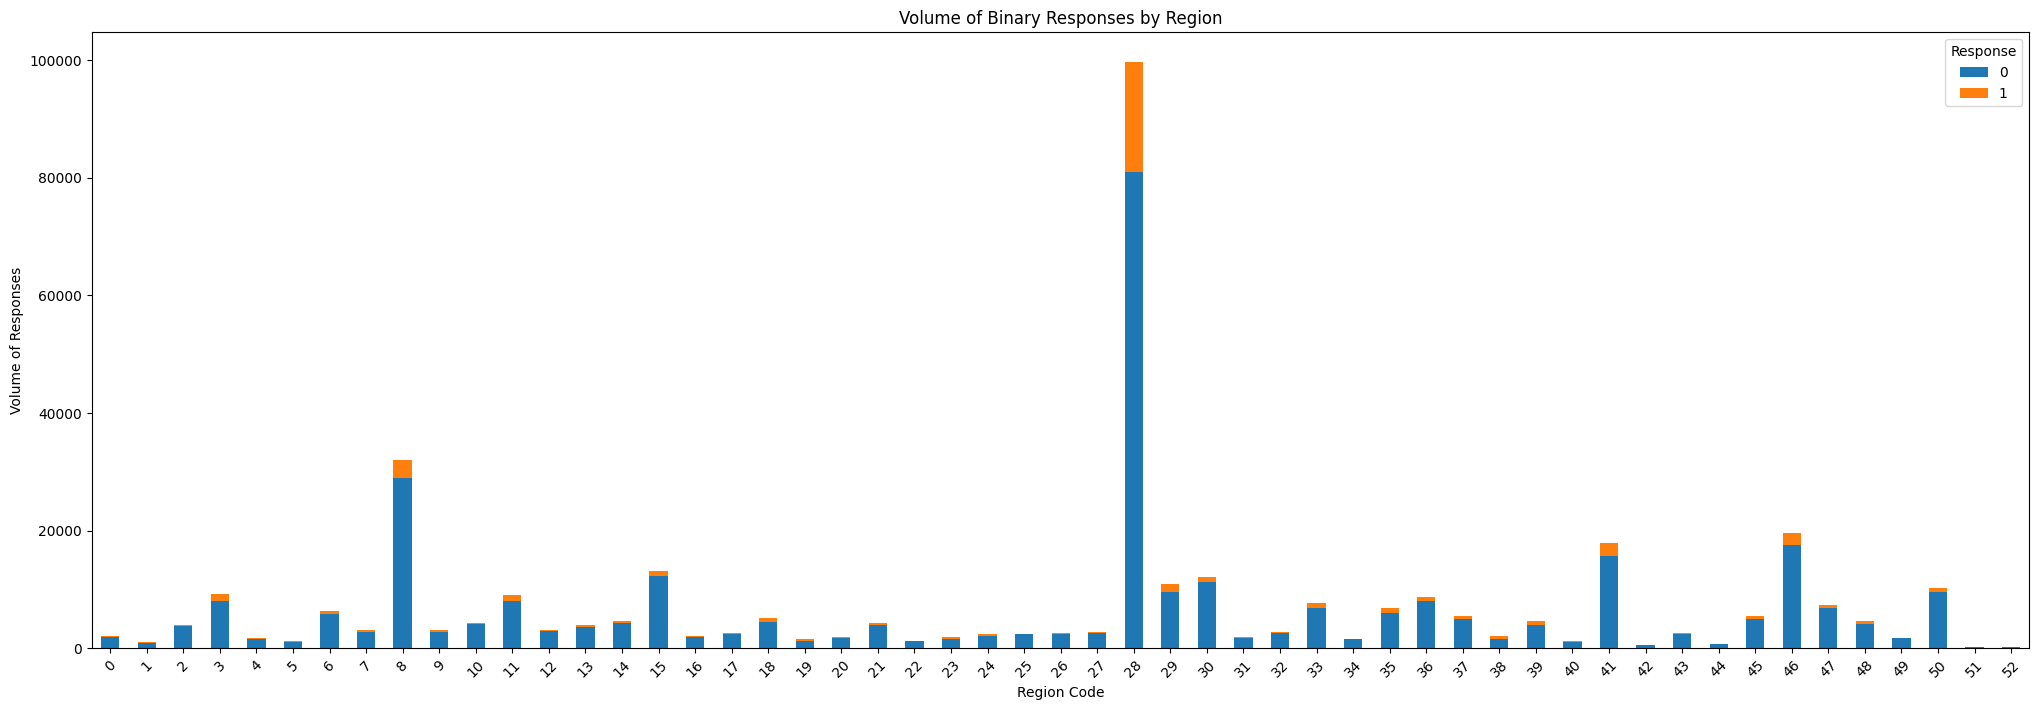

In [37]:
# Grouping data to count responses per region
data = df_clean.groupby(['Region_Code', 'Response']).size().unstack(fill_value=0)

# Plotting the volume of responses for each region
f, ax = plt.subplots(figsize=(25,8))
data.plot(kind='bar', stacked=True, ax=ax)

ax.set_xlabel('Region Code')
ax.set_ylabel('Volume of Responses')
ax.tick_params(axis='x', labelrotation=45)
ax.set_title('Volume of Binary Responses by Region')

plt.show()

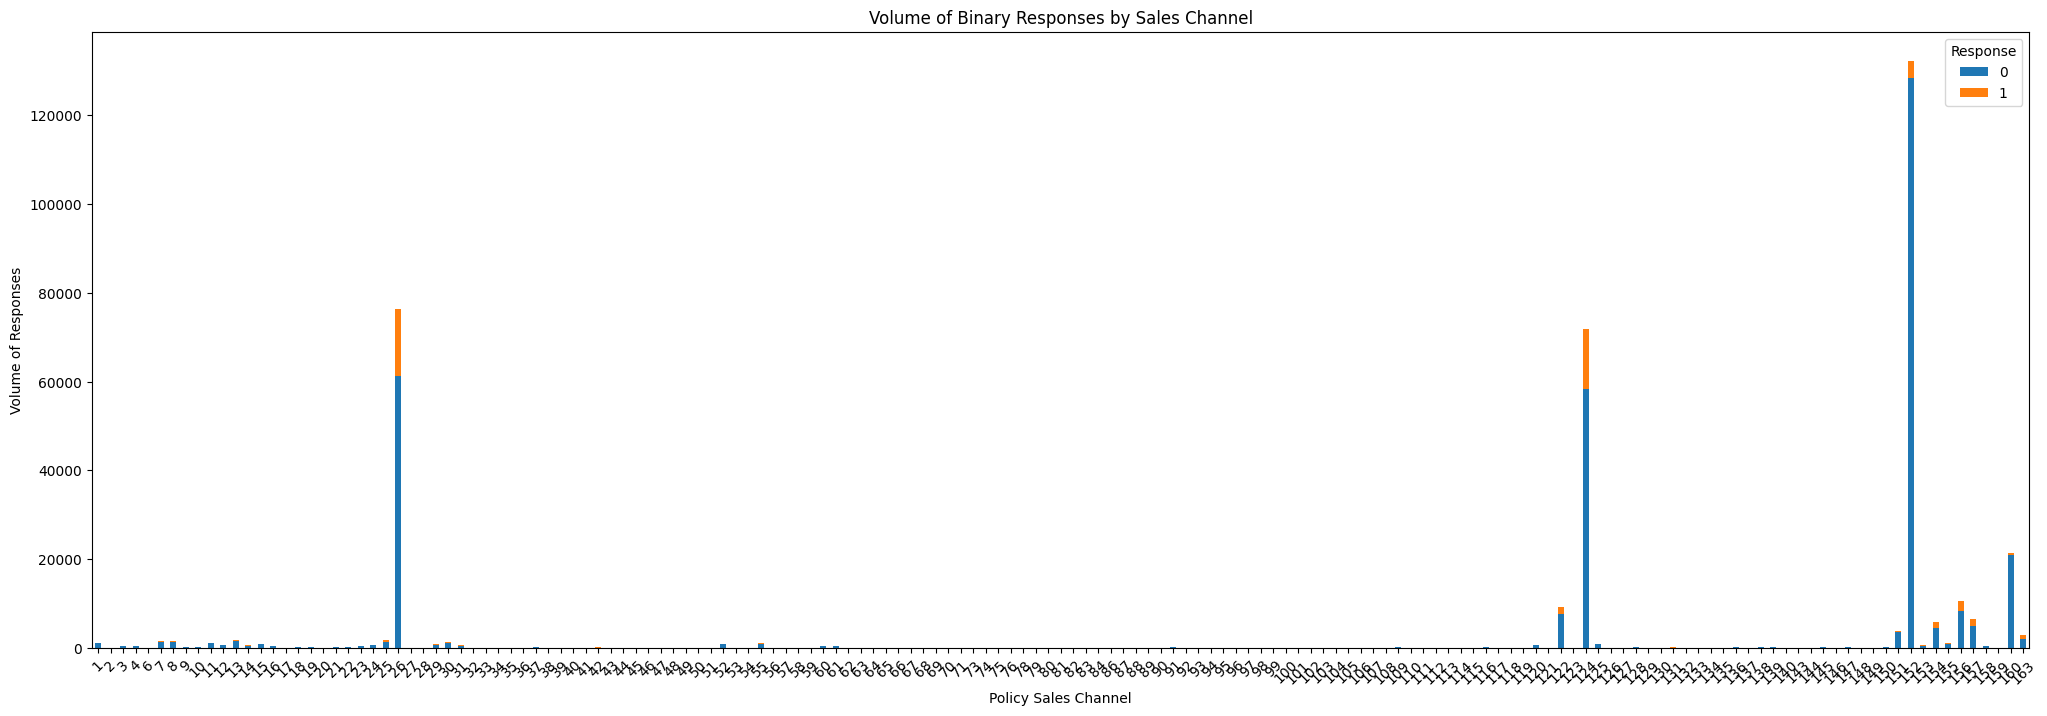

In [38]:
# Grouping data to count responses per region
data = df_clean.groupby(['Policy_Sales_Channel', 'Response']).size().unstack(fill_value=0)

# Plotting the volume of responses for each region
f, ax = plt.subplots(figsize=(25,8))
data.plot(kind='bar', stacked=True, ax=ax)

ax.set_xlabel('Policy Sales Channel')
ax.set_ylabel('Volume of Responses')
ax.tick_params(axis='x', labelrotation=45)
ax.set_title('Volume of Binary Responses by Sales Channel')

plt.show()

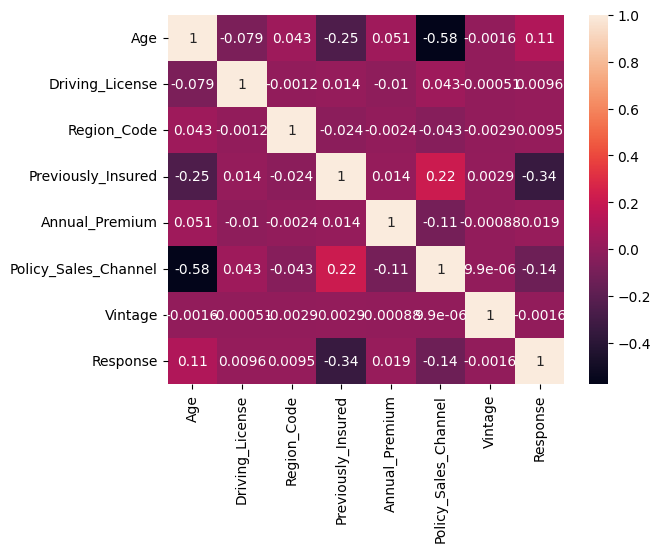

In [39]:
ax = sns.heatmap(df_clean.corr(numeric_only=True), annot=True)

In [40]:
high_corr = abs(df_clean.corr(numeric_only=True))
high_corr['Response']

Age                     0.110938
Driving_License         0.009630
Region_Code             0.009474
Previously_Insured      0.340913
Annual_Premium          0.018566
Policy_Sales_Channel    0.136805
Vintage                 0.001631
Response                1.000000
Name: Response, dtype: float64

### Conclusion
1. No Missing data found
2. Almost all data varies significantly, for example Annual_Premium which ranging from 2640 to 540165 with an average of 30564.
3. The target variable **Response** is highly imbalanced, with only 12.25% of the responses being positives(1)
4. Dataset has several categorical columns (**Gender, Vehicle_Age, and Vehicle Damage**) that has to be encoded.
5. No Clear correlations to target variable.

## Data Preprocessing

In [41]:
# Handling Categorical Data with Encode categorical variables
# Encoding 'Gender' (Male=1, Female=0)
df_clean['Gender'] = df_clean['Gender'].map({'Male': 1, 'Female': 0})
# One-hot encoding for 'Vehicle_Age' and 'Vehicle_Damage'
df_encoded = pd.get_dummies(df_clean, columns=['Vehicle_Age', 'Vehicle_Damage'], drop_first=True, dtype=int)
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Index: 370789 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                 Non-Null Count   Dtype
---  ------                 --------------   -----
 0   Gender                 370789 non-null  int64
 1   Age                    370789 non-null  int64
 2   Driving_License        370789 non-null  int64
 3   Region_Code            370789 non-null  int64
 4   Previously_Insured     370789 non-null  int64
 5   Annual_Premium         370789 non-null  int64
 6   Policy_Sales_Channel   370789 non-null  int64
 7   Vintage                370789 non-null  int64
 8   Response               370789 non-null  int64
 9   Vehicle_Age_< 1 Year   370789 non-null  int64
 10  Vehicle_Age_> 2 Years  370789 non-null  int64
 11  Vehicle_Damage_Yes     370789 non-null  int64
dtypes: int64(12)
memory usage: 36.8 MB


Gender                   0.052305
Age                      0.110938
Driving_License          0.009630
Region_Code              0.009474
Previously_Insured       0.340913
Annual_Premium           0.018566
Policy_Sales_Channel     0.136805
Vintage                  0.001631
Response                 1.000000
Vehicle_Age_< 1 Year     0.209780
Vehicle_Age_> 2 Years    0.105363
Vehicle_Damage_Yes       0.354096
Name: Response, dtype: float64


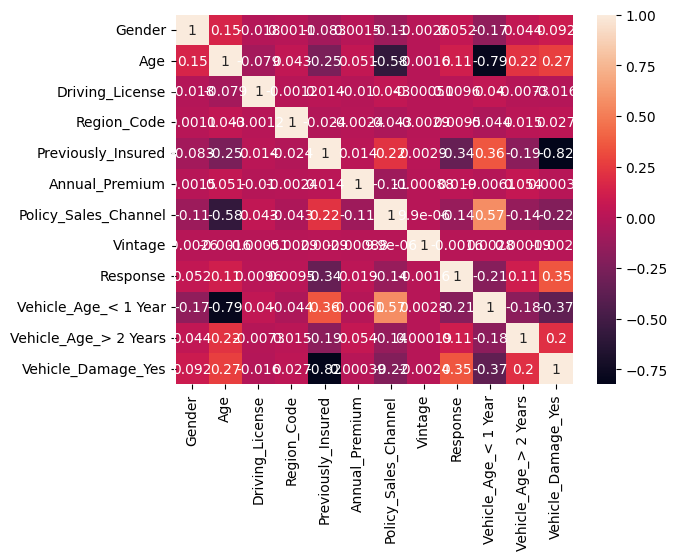

In [42]:
ax = sns.heatmap(df_encoded.corr(numeric_only=True), annot=True)
high_corr = df_encoded.corr(numeric_only=True)
print(abs(high_corr['Response']))

In [43]:
df_encoded['Annual_Premium'].describe()

count    370789.000000
mean      29264.643973
std       14743.056656
min        2630.000000
25%       24102.000000
50%       31319.000000
75%       38596.000000
max       61892.000000
Name: Annual_Premium, dtype: float64

In [45]:
def map_annual_premium(premium):
    if premium <= 24000 :
        return 0
    elif premium <= 31300:
        return 1
    elif premium <= 38500:
        return 2
    else:
        return 3

# Apply the function to create the 'annual_group' feature
df_encoded['annual_group'] = df_encoded['Annual_Premium'].apply(map_annual_premium)
df_encoded.head(10).T

,0,1,2,3,4,5,6,7,8,9
Gender,1,1,1,1,0,0,1,0,0,0
Age,44,76,47,21,29,24,23,56,24,32
Driving_License,1,1,1,1,1,1,1,1,1,1
Region_Code,28,3,28,11,41,33,11,28,3,6
Previously_Insured,0,0,0,1,1,0,0,0,1,1
Annual_Premium,40454,33536,38294,28619,27496,2630,23367,32031,27619,28771
Policy_Sales_Channel,26,26,26,152,152,160,152,26,152,152
Vintage,217,183,27,203,39,176,249,72,28,80
Response,1,0,1,0,0,0,0,1,0,0
Vehicle_Age_< 1 Year,0,0,0,1,1,1,1,0,1,1


In [46]:
df_encoded['annual_group'].value_counts()

annual_group
3    93657
1    93269
2    92022
0    91841
Name: count, dtype: int64

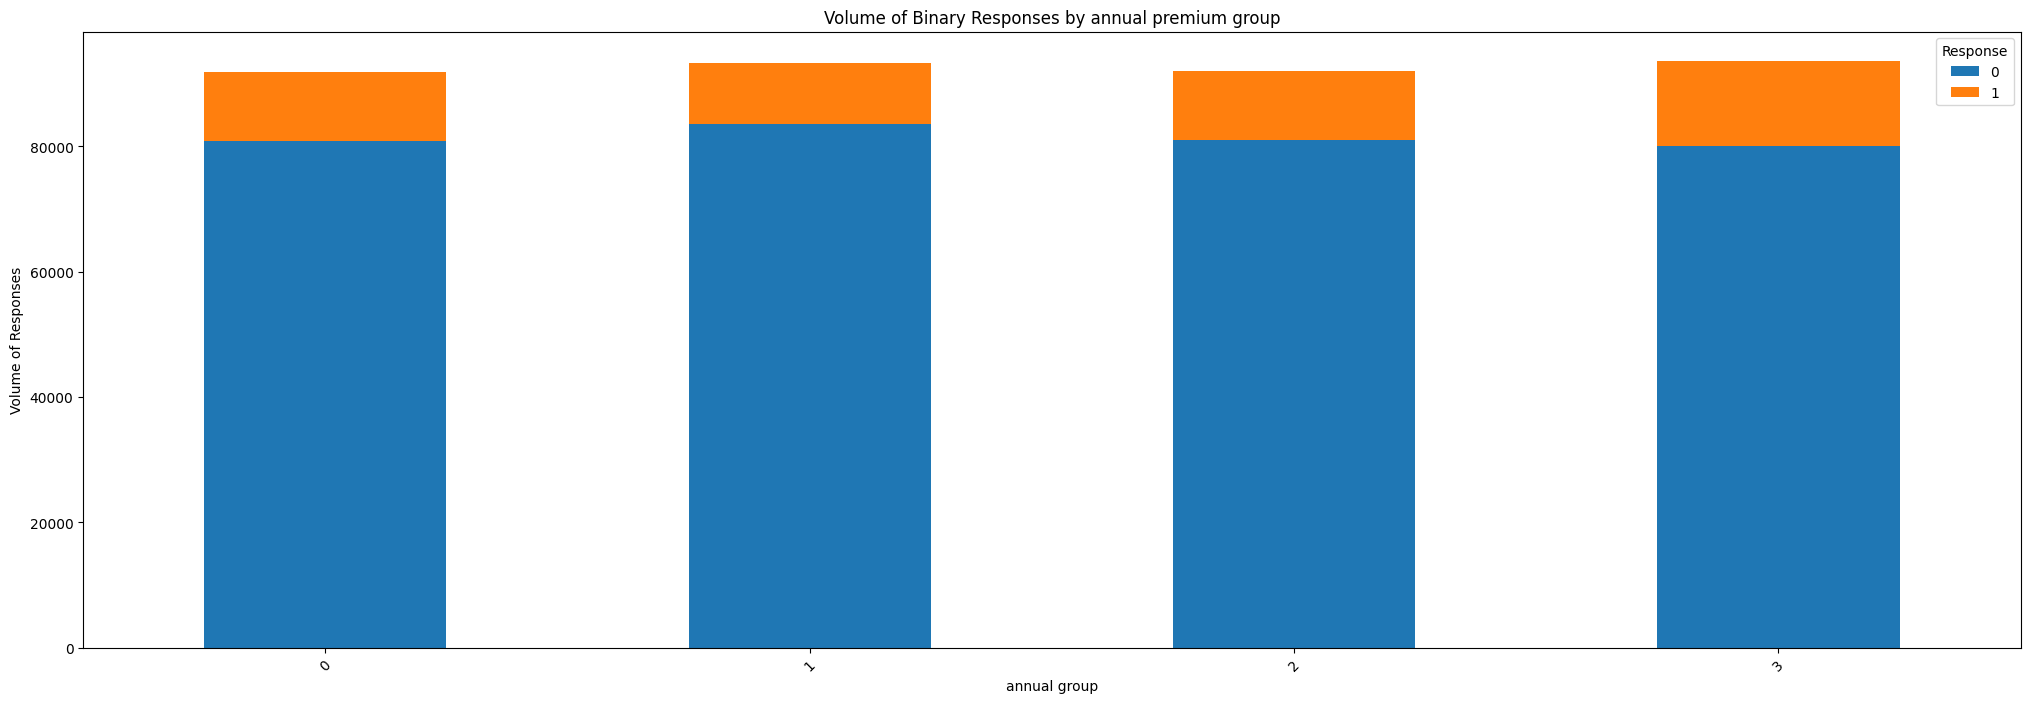

In [47]:
# Grouping data to count responses per region
data = df_encoded.groupby(['annual_group', 'Response']).size().unstack(fill_value=0)

# Plotting the volume of responses for each region
f, ax = plt.subplots(figsize=(25,8))
data.plot(kind='bar', stacked=True, ax=ax)

ax.set_xlabel('annual group')
ax.set_ylabel('Volume of Responses')
ax.tick_params(axis='x', labelrotation=45)
ax.set_title('Volume of Binary Responses by annual premium group')

plt.show()

Gender                   0.052305
Age                      0.110938
Driving_License          0.009630
Region_Code              0.009474
Previously_Insured       0.340913
Annual_Premium           0.018566
Policy_Sales_Channel     0.136805
Vintage                  0.001631
Response                 1.000000
Vehicle_Age_< 1 Year     0.209780
Vehicle_Age_> 2 Years    0.105363
Vehicle_Damage_Yes       0.354096
annual_group             0.032328
Name: Response, dtype: float64


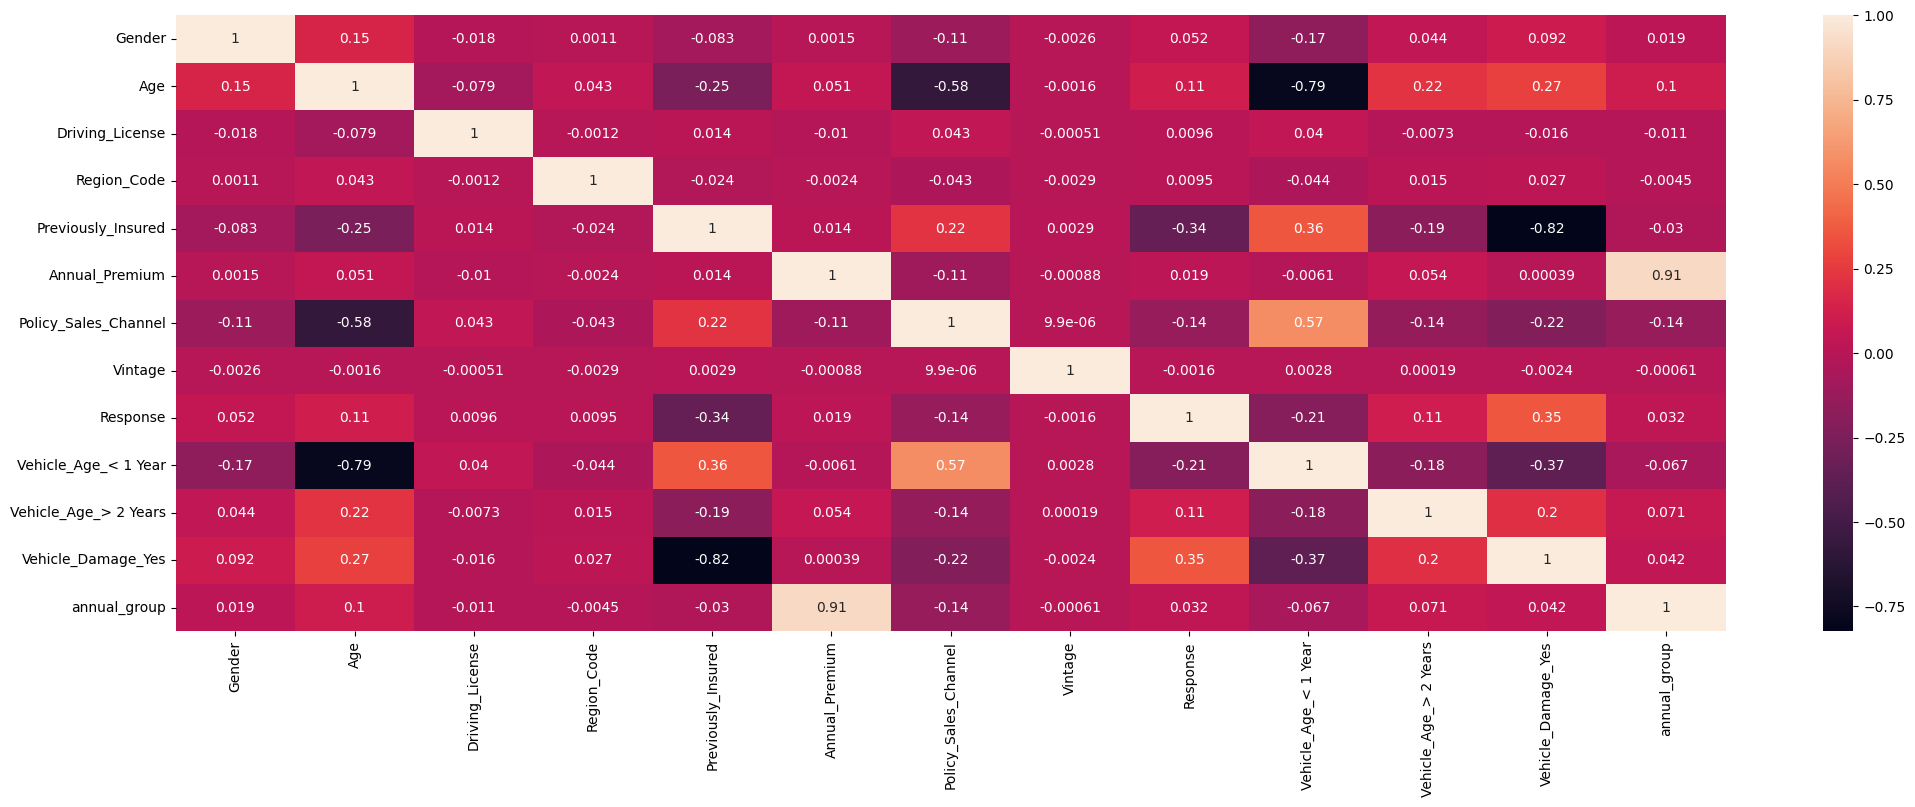

In [48]:
f, ax = plt.subplots(figsize=(25,8))
ax = sns.heatmap(df_encoded.corr(numeric_only=True), annot=True)
high_corr = df_encoded.corr(numeric_only=True)
print(abs(high_corr['Response']))

In [52]:
df_encoded['Region_Code'].describe()

count    370789.000000
mean         26.437281
std          13.310391
min           0.000000
25%          15.000000
50%          28.000000
75%          36.000000
max          52.000000
Name: Region_Code, dtype: float64

In [53]:
bins = list(range(0, 52, 7))  # Bins will be [0, 5, 10, ..., 50]
labels = list(range(len(bins) - 1))  # Labels will be [0, 1, 2, ..., 9]

# Create the 'region_group' feature using pd.cut()
df_encoded['region_group'] = pd.cut(df_encoded['Region_Code'], bins=bins, labels=labels, right=False)

df_encoded.head(10).T

,0,1,2,3,4,5,6,7,8,9
Gender,1,1,1,1,0,0,1,0,0,0
Age,44,76,47,21,29,24,23,56,24,32
Driving_License,1,1,1,1,1,1,1,1,1,1
Region_Code,28,3,28,11,41,33,11,28,3,6
Previously_Insured,0,0,0,1,1,0,0,0,1,1
Annual_Premium,40454,33536,38294,28619,27496,2630,23367,32031,27619,28771
Policy_Sales_Channel,26,26,26,152,152,160,152,26,152,152
Vintage,217,183,27,203,39,176,249,72,28,80
Response,1,0,1,0,0,0,0,1,0,0
Vehicle_Age_< 1 Year,0,0,0,1,1,1,1,0,1,1


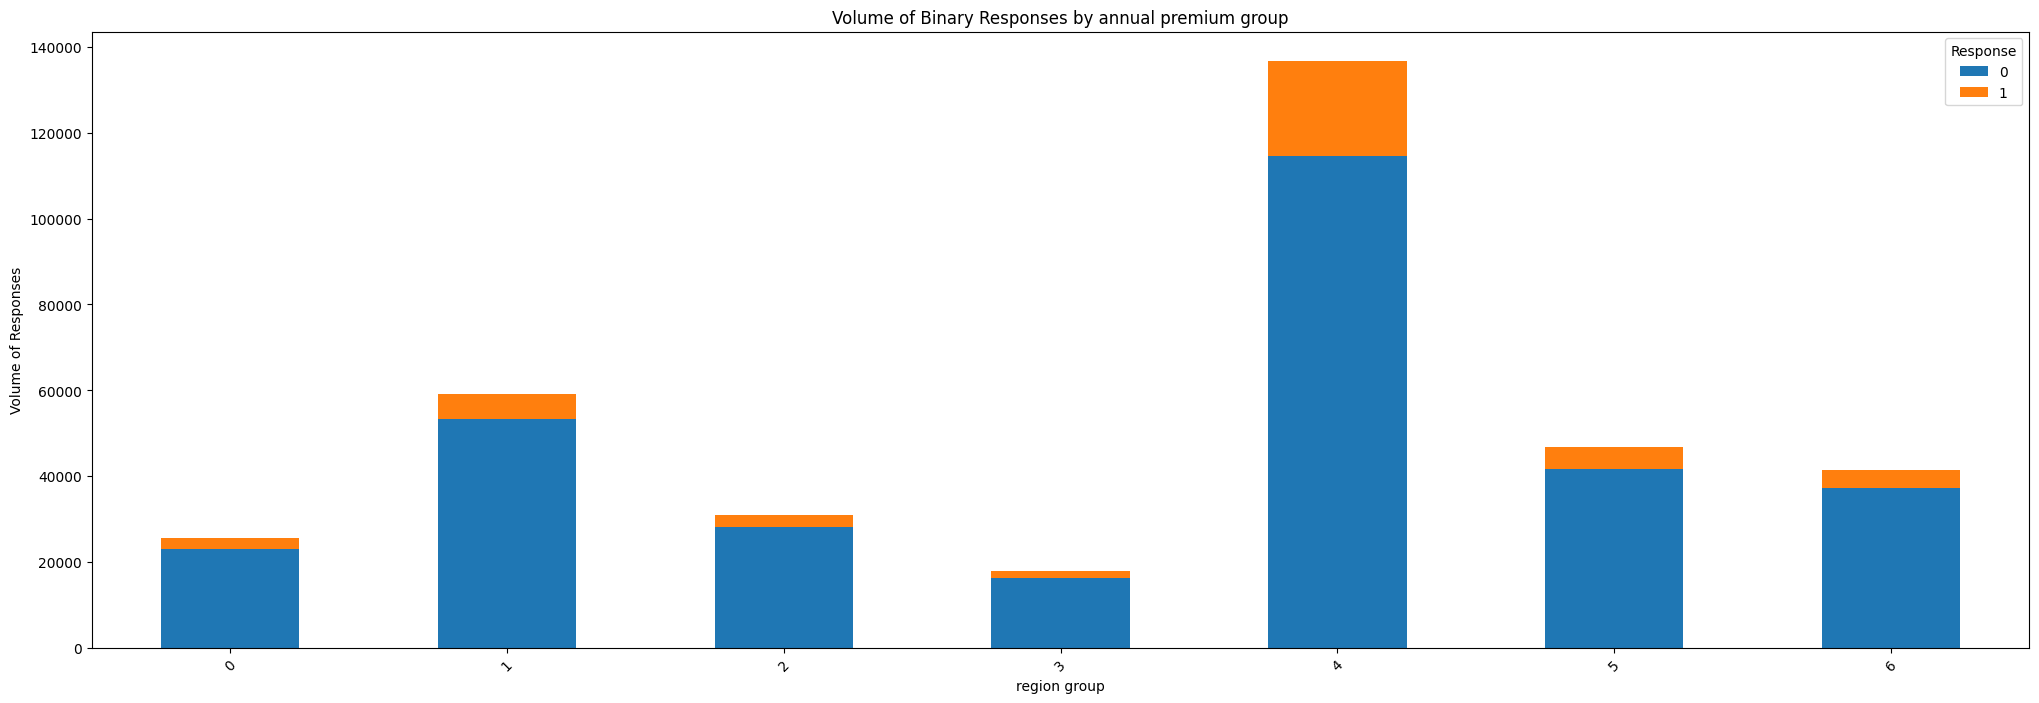

region_group
4    136806
1     59028
5     46856
6     41309
2     30949
0     25581
3     17812
Name: count, dtype: int64

In [54]:
# Grouping data to count responses per region
data = df_encoded.groupby(['region_group', 'Response']).size().unstack(fill_value=0)

# Plotting the volume of responses for each region
f, ax = plt.subplots(figsize=(25,8))
data.plot(kind='bar', stacked=True, ax=ax)

ax.set_xlabel('region group')
ax.set_ylabel('Volume of Responses')
ax.tick_params(axis='x', labelrotation=45)
ax.set_title('Volume of Binary Responses by annual premium group')

plt.show()

df_encoded['region_group'].value_counts()

In [55]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Index: 370789 entries, 0 to 381108
Data columns (total 14 columns):
 #   Column                 Non-Null Count   Dtype   
---  ------                 --------------   -----   
 0   Gender                 370789 non-null  int64   
 1   Age                    370789 non-null  int64   
 2   Driving_License        370789 non-null  int64   
 3   Region_Code            370789 non-null  int64   
 4   Previously_Insured     370789 non-null  int64   
 5   Annual_Premium         370789 non-null  int64   
 6   Policy_Sales_Channel   370789 non-null  int64   
 7   Vintage                370789 non-null  int64   
 8   Response               370789 non-null  int64   
 9   Vehicle_Age_< 1 Year   370789 non-null  int64   
 10  Vehicle_Age_> 2 Years  370789 non-null  int64   
 11  Vehicle_Damage_Yes     370789 non-null  int64   
 12  annual_group           370789 non-null  int64   
 13  region_group           358341 non-null  category
dtypes: category(1), int64(13)

Gender                   0.052305
Age                      0.110938
Driving_License          0.009630
Region_Code              0.009474
Previously_Insured       0.340913
Annual_Premium           0.018566
Policy_Sales_Channel     0.136805
Vintage                  0.001631
Response                 1.000000
Vehicle_Age_< 1 Year     0.209780
Vehicle_Age_> 2 Years    0.105363
Vehicle_Damage_Yes       0.354096
annual_group             0.032328
region_group             0.032890
Name: Response, dtype: float64


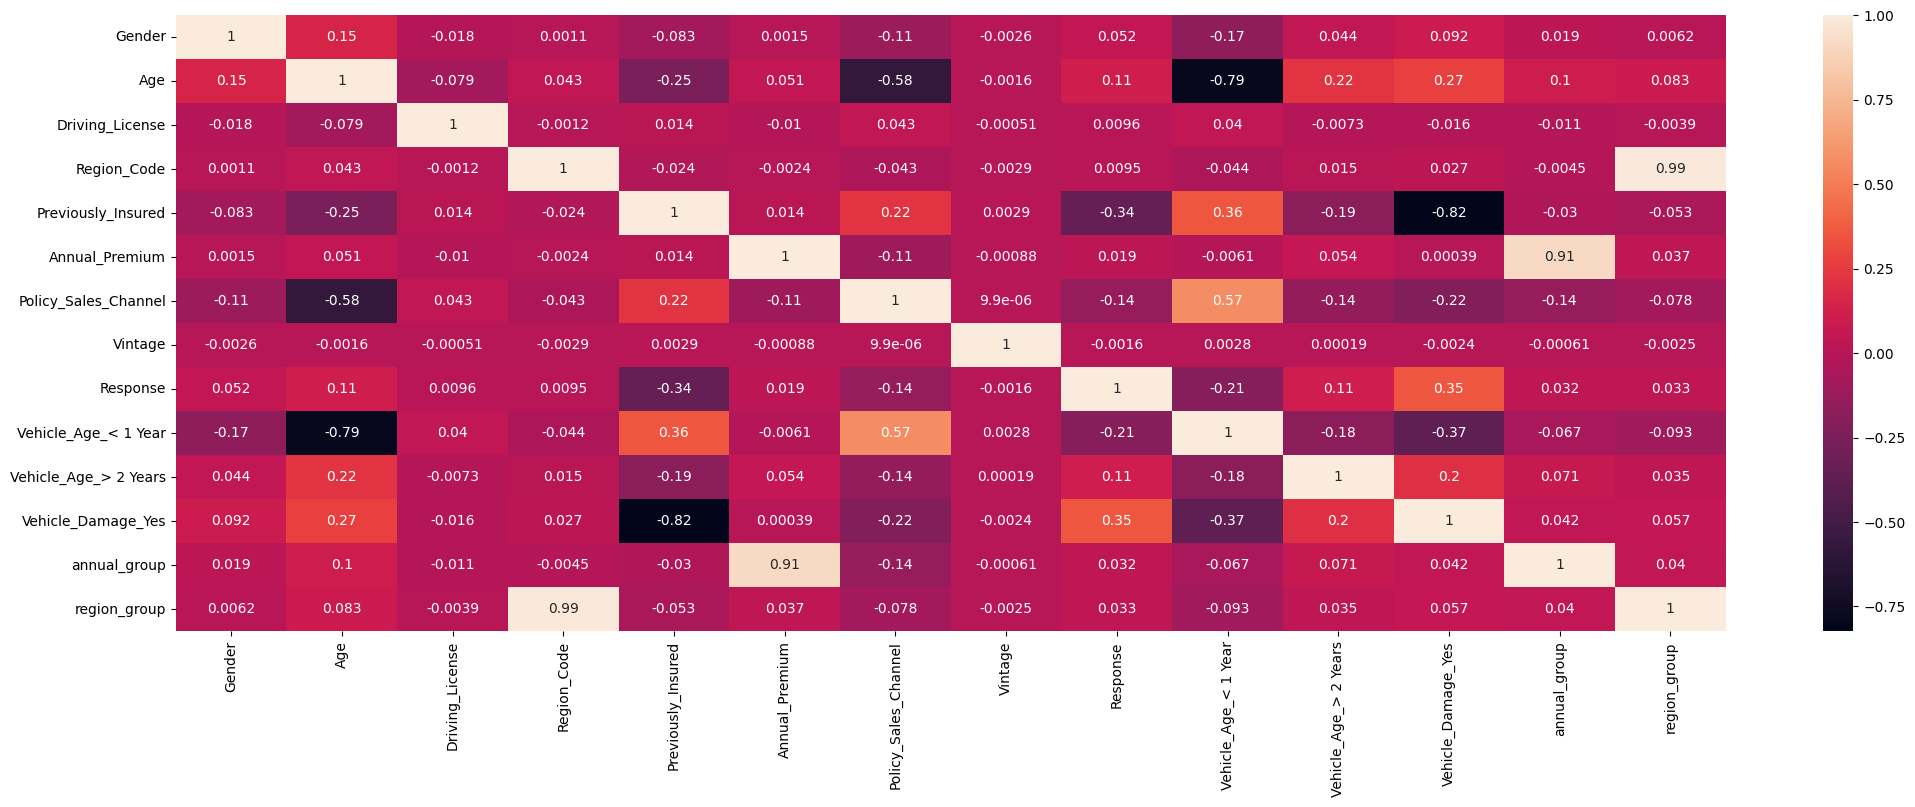

In [56]:
f, ax = plt.subplots(figsize=(25,8))
plt.figsize = (25,15)
ax = sns.heatmap(df_encoded.corr(), annot=True)
high_corr = df_encoded.corr()
print(abs(high_corr['Response']))

In [57]:
dropCols = ['Driving_License', 'Region_Code', 'Annual_Premium', 'Vintage']
df_encoded = df_encoded.drop(dropCols, axis=1)
df_encoded.head(10).T

,0,1,2,3,4,5,6,7,8,9
Gender,1,1,1,1,0,0,1,0,0,0
Age,44,76,47,21,29,24,23,56,24,32
Previously_Insured,0,0,0,1,1,0,0,0,1,1
Policy_Sales_Channel,26,26,26,152,152,160,152,26,152,152
Response,1,0,1,0,0,0,0,1,0,0
Vehicle_Age_< 1 Year,0,0,0,1,1,1,1,0,1,1
Vehicle_Age_> 2 Years,1,0,1,0,0,0,0,0,0,0
Vehicle_Damage_Yes,1,0,1,0,0,1,1,1,0,0
annual_group,3,2,2,1,1,0,0,2,1,1
region_group,4,0,4,1,5,4,1,4,0,0


In [58]:
# Split X and Y
y = df_encoded['Response']
X = df_encoded.drop(['Response'], axis=1)

In [60]:
X.head(10).T

,0,1,2,3,4,5,6,7,8,9
Gender,1,1,1,1,0,0,1,0,0,0
Age,44,76,47,21,29,24,23,56,24,32
Previously_Insured,0,0,0,1,1,0,0,0,1,1
Policy_Sales_Channel,26,26,26,152,152,160,152,26,152,152
Vehicle_Age_< 1 Year,0,0,0,1,1,1,1,0,1,1
Vehicle_Age_> 2 Years,1,0,1,0,0,0,0,0,0,0
Vehicle_Damage_Yes,1,0,1,0,0,1,1,1,0,0
annual_group,3,2,2,1,1,0,0,2,1,1
region_group,4,0,4,1,5,4,1,4,0,0


## Let's Handling Imbalanced Dataset

In [61]:
# Split the data first, cause we only want to do oversampling on training data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=1)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((333710, 9), (37079, 9), (333710,), (37079,))

In [62]:
from imblearn.over_sampling import SMOTE
oversample = SMOTE()
X_train, y_train = oversample.fit_resample(X_train,y_train)
X_train.shape, y_train.shape

/home/wicom/.local/lib/python3.8/site-packages/pandas/core/arrays/base.py:485: RuntimeWarning: invalid value encountered in cast
  result = np.asarray(self, dtype=dtype)


((586106, 9), (586106,))

In [63]:
# Scaling with Standard Scaler / Min Max Scaler
StdScaler = StandardScaler()
scale_std = StdScaler.fit(X_train)
df_scaled_std_train = StdScaler.transform(X_train)
df_scaled_std_test = StdScaler.transform(X_test)

/home/wicom/.local/lib/python3.8/site-packages/pandas/core/arrays/base.py:485: RuntimeWarning: invalid value encountered in cast
  result = np.asarray(self, dtype=dtype)
/home/wicom/.local/lib/python3.8/site-packages/pandas/core/arrays/base.py:485: RuntimeWarning: invalid value encountered in cast
  result = np.asarray(self, dtype=dtype)
/home/wicom/.local/lib/python3.8/site-packages/pandas/core/arrays/base.py:485: RuntimeWarning: invalid value encountered in cast
  result = np.asarray(self, dtype=dtype)
/home/wicom/.local/lib/python3.8/site-packages/pandas/core/arrays/base.py:485: RuntimeWarning: invalid value encountered in cast
  result = np.asarray(self, dtype=dtype)
/home/wicom/.local/lib/python3.8/site-packages/pandas/core/arrays/base.py:485: RuntimeWarning: invalid value encountered in cast
  result = np.asarray(self, dtype=dtype)


In [64]:
MMScaler = MinMaxScaler()
scale_mm = MMScaler.fit(X_train)
df_scaled_mm_train = MMScaler.transform(X_train)
df_scaled_mm_test = MMScaler.transform(X_test)

/home/wicom/.local/lib/python3.8/site-packages/pandas/core/arrays/base.py:485: RuntimeWarning: invalid value encountered in cast
  result = np.asarray(self, dtype=dtype)
/home/wicom/.local/lib/python3.8/site-packages/pandas/core/arrays/base.py:485: RuntimeWarning: invalid value encountered in cast
  result = np.asarray(self, dtype=dtype)
/home/wicom/.local/lib/python3.8/site-packages/pandas/core/arrays/base.py:485: RuntimeWarning: invalid value encountered in cast
  result = np.asarray(self, dtype=dtype)
/home/wicom/.local/lib/python3.8/site-packages/pandas/core/arrays/base.py:485: RuntimeWarning: invalid value encountered in cast
  result = np.asarray(self, dtype=dtype)
/home/wicom/.local/lib/python3.8/site-packages/pandas/core/arrays/base.py:485: RuntimeWarning: invalid value encountered in cast
  result = np.asarray(self, dtype=dtype)


In [65]:
# Save clean data into pickle
pkl.dump(df_scaled_std_train, open('CleanDataset/X_train.pkl', 'wb'))
pkl.dump(df_scaled_std_test, open('CleanDataset/X_test.pkl', 'wb'))
pkl.dump(y_train, open('CleanDataset/y_train.pkl', 'wb'))
pkl.dump(y_test, open('CleanDataset/y_test.pkl', 'wb'))
pkl.dump(MMScaler, open('CleanDataset/StdScaller.pkl', 'wb'))

In [66]:
df_scaled_std_train

array([[ 0.89820178, -0.95407482,  1.68026382, ..., -1.55505799,
         1.30543195,  0.16613223],
       [ 0.89820178,  0.51860417,  1.68026382, ..., -1.55505799,
         1.30543195,  0.16613223],
       [ 0.89820178, -0.67356454, -0.59514463, ..., -1.55505799,
        -1.34267342,  0.16613223],
       ...,
       [-1.11333558,  0.37834903, -0.59514463, ...,  0.64306283,
         1.30543195,  0.16613223],
       [-1.11333558, -0.18267154, -0.59514463, ...,  0.64306283,
         0.42273016,  0.16613223],
       [ 0.89820178,  0.79911446, -0.59514463, ...,  0.64306283,
        -0.45997163,  0.16613223]])

In [68]:
df_scaled_std_train.shape

(586106, 9)

In [69]:
df_scaled_std_test.shape

(37079, 9)